## One-way ANOVA in R: the whole story (more or less)

At it's heart, the ANOVA is simply a way to check whether or not the groups in your data have as much variation among themselves as there is between the groups. Let's perform one such analysis on an interesting dataset.

Nolen-Hoeksema and Morrow (1991) had the good fortune to have measured depression among college students two weeks before the Loma Prieta earthquake in California in 1989. (This was a "big-deal" of an earthquake, and would have expected to have measurable effects on students). Having collected these data, the researchers went out and collected repeated data to track the students’s adjustment to the earthquake. Measurements were taken every three weeks starting with the original measurement two weeks before the earthquake, and then 1, 4, 7, and 10 weeks after. This is a very suitable dataset to evaluate and see what ANOVA is all about.

Let's read the dataset first, and look at the first few rows. The dataset contains the following variables:
1. **Dep.Score**: The student’s depression score (the higher, the more depressed)
2. **Week**: -2 = two weeks prior to the earthquake, 1 = one week after, 4 = four weeks after, 7 = seven weeks after, and 10 = ten weeks after
3. **Subject**: Student’s index

In [8]:
data = read.table("Desktop/datasets/depression.txt", header=TRUE)
head(data)

Dep.Score,Week,Subject
6,-2,1
2,-2,2
2,-2,3
4,-2,4
4,-2,5
5,-2,6


The 'groups' we're trying to compare here are the weeks before and after the earthquake. We wish to see whether or not there's been a change in the depression scores before and after the earthquake. Let's store the two quantities of interest separately in two variables:

In [10]:
scores = data[,1]
week = data[,2]

#### Some exploratory analysis first:
Let's draw some boxplots and see if we can notice some obvious things:

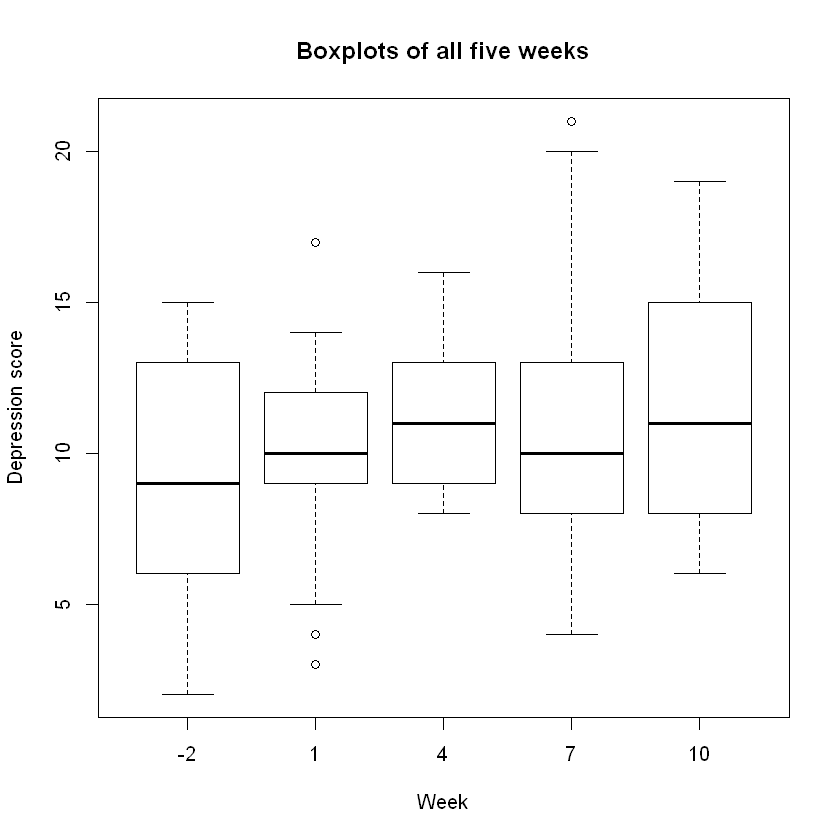

In [12]:
boxplot(scores ~ as.factor(week), xlab = "Week", ylab = "Depression score")
title(main = "Boxplots of all five weeks")

At a first glance, it seems that there was not much change in the depression scores before and after the earthquake. The variation in the groups themselves seems quite a bit more than the variation between groups. But we can't really say for sure. That's what ANOVA is for!

In [14]:
# converting week to factor type before running ANOVA - this is important before running ANOVA
week = as.factor(week)

# preparing the ANOVA model and fetching summary
anova_model = aov(scores ~ week)
summary(anova_model)

             Df Sum Sq Mean Sq F value Pr(>F)  
week          4  144.8   36.19   2.383 0.0552 .
Residuals   120 1822.2   15.19                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

The key takeaway from the results is the p-value. Usually, we say that there's a statistically significant variation **between the groups** when the p-value is very small. The smaller this value is, the more confidently we can assert that the groups (technically, their means) are different from one another. Ideally, we draw the line at a value of 0.05; for values larger than this, we say that groups aren't different.

Here, the value is close to 0.05, infact it's a bit larger than that, so we'd conclude that the groups aren't in fact all that different.

Hold your horses though, because the value of 0.05 comes from a 95% confidence level (which is by far the most commonly used confidence level, some people use 99% to make sure they are reporting really statistically significant results). But if we were to have, say a 90% confidence interval, we **could** say that the groups (that is, their means) are different.

*P.S. don't do that though, a 90% confidence level is unheard of! This is just for arguement's sake.*

Okay, so if the groups (yeah, yeah, their means!) are different, which groups are different exactly? Are all of them same, save for one? Or something else like that?

This is where we can use a technique a good guy called [Tukey](https://en.wikipedia.org/wiki/John_Tukey) put together, called Tukey's pairwise comparison (By the way, he also developed the box plot). As is evident from the name, this compares the groups pairwise, and then we can see what groups are different (and to what degree). Let's see how it's implemented below:

In [17]:
# carrying out Tukey's pairwise comparison
# you'll need the "stats" package to run this code
pair_comp = TukeyHSD(anova_model, which = 'week', conf.level = 0.95)
pair_comp

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = scores ~ week)

$week
       diff         lwr      upr     p adj
1--2   1.44 -1.61273302 4.492733 0.6877236
4--2   2.68 -0.37273302 5.732733 0.1140393
7--2   2.16 -0.89273302 5.212733 0.2921157
10--2  3.04 -0.01273302 6.092733 0.0515279
4-1    1.24 -1.81273302 4.292733 0.7930257
7-1    0.72 -2.33273302 3.772733 0.9657308
10-1   1.60 -1.45273302 4.652733 0.5957066
7-4   -0.52 -3.57273302 2.532733 0.9897394
10-4   0.36 -2.69273302 3.412733 0.9975094
10-7   0.88 -2.17273302 3.932733 0.9306030


To see what pairs of groups are statistically significantly different, notice the pairwise p-values above.

As before, the smaller the p-value, the more confident we can be that the group means are indeed different. In this context, the groups **10 and -2** have the smalles p-value, but even that is not very small (it's slightly larger than 0.05). 

So we could after all conclude that these groups are really not that different, but if we're splitting hairs, we could say that groups `10` and `-2` are the most different among these groups, but not to a degree we would deem statistically significant.